### Exploratory Data Analysis

In [58]:
import pandas as pd
import ast
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns

#### Importing data

In [102]:
# Read in TMDB movie data for 2015-2024
tmdb_data_2015_2024 = pd.read_csv(f'../data/movies_2015_2024.csv').drop_duplicates(subset=['Title','Year'])

# Import best picture data
best_picture = pd.read_csv('../data/best_picture.csv')
best_picture['Nominated'] = 'Yes'

In [103]:
# Merge best picture data and TMDB API data into a single DataFrame
movies_2015_2024_df = best_picture.merge(tmdb_data_2015_2024, how='right', on=['Title','Year'], validate='1:1')

# Fill NaN values 
values = {'Winner': 'No', 'Nominated': 'No'}
movies_2015_2024_df = movies_df.fillna(value=values)

In [104]:
# Convert Genre column to list type so that it can be exploded
movies_2015_2024_df['Genre'] = movies_2015_2024_df['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Explode the movies_df DataFrame by genre
movies_df_exploded = movies_2015_2024_df.explode('Genre')

#### Research question: How popular is each genre over the last decade?

In [45]:
# Convert Genre column to list type so that it can be exploded
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

In [38]:
# Explode the movies_df DataFrame by genre
movies_df_exploded = movies_df.explode('Genre')

In [39]:
# Create an indicator variable for each genre
genre_dummies = pd.get_dummies(movies_df_exploded['Genre'], prefix='genre')

In [40]:
# Group the genre indicator variables so that we have 1 row per movie
genre_dummies_grouped = genre_dummies.groupby(level=0).max()

# Replace spaces in column names with underscores
genre_dummies_grouped.columns = [column.replace(' ','_') for column in genre_dummies_grouped.columns]

In [41]:
# Join the genre indicator variables to the movies_df DataFrame
movies_genre_indicator = movies_df.join(genre_dummies_grouped)

In [42]:
# Fitting a linear regression model for vote_average using years and each of the genre indicator variables

# Extract all of the genre indicator variables and concatenate them with plus signs to be used in the linear model
genre_indicators = [column for column in movies_genre_indicator.columns if 'genre_' in column]
genre_indicators = ' + '.join(genre_indicators)

popularity_model_with_genres = smf.ols(f'Vote_Average ~ Year + {genre_indicators}', data = movies_genre_indicator).fit()
popularity_model_with_genres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Vote_Average   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     14.53
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.62e-43
Time:                        20:54:30   Log-Likelihood:                -868.55
No. Observations:                1005   AIC:                             1779.
Df Residuals:                     984   BIC:                             1882.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -51.0257     13.010     -3.922      0.000     -76.557     -25.495
genre_Action[T.True]             -0.0564      0.052     -1.083      0.279      -0.159       0.046
genre_Adventure[T.True]           0.0357      0.054      0.658      0.510      -0.071       0.142
genre_Animation[T.True]           0.6238      0.084      7.433      0.000       0.459       0.789
genre_Comedy[T.True]             -0.1015      0.050     -2.025      0.043      -0.200      -0.003
genre_Crime[T.True]              -0.0382      0.060     -0.634      0.526      -0.156       0.080
genre_Documentary[T.True]         0.3735      0.341      1.096      0.273      -0.295       1.042
genre_Drama[T.True]               0.2760      0.054      5.107      0.000       0.170       0.382
genre_Family[T.True]             -0.1276      0.085     -1.501      0.134      -0.294       0.039
genre_Fantasy[T.True]            -0.1571      0.058     -2.700      0.007      -0.271      -0.043
genre_History[T.True]             0.1210      0.085      1.423      0.155      -0.046       0.288
genre_Horror[T.True]             -0.3124      0.063     -4.939      0.000      -0.437      -0.188
genre_Music[T.True]               0.0791      0.115      0.688      0.492      -0.147       0.305
genre_Mystery[T.True]            -0.0598      0.067     -0.898      0.370      -0.191       0.071
genre_Romance[T.True]             0.0557      0.064      0.871      0.384      -0.070       0.181
genre_Science_Fiction[T.True]    -0.1076      0.055     -1.970      0.049      -0.215      -0.000
genre_TV_Movie[T.True]            0.6443      0.418      1.541      0.124      -0.176       1.465
genre_Thriller[T.True]           -0.1143      0.050     -2.272      0.023      -0.213      -0.016
genre_War[T.True]                 0.1056      0.126      0.839      0.402      -0.141       0.353
genre_Western[T.True]             0.0197      0.198      0.099      0.921      -0.369       0.408
Year                              0.0287      0.006      4.454      0.000       0.016       0.041
==============================================================================
Omnibus:                       23.749   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.361
Skew:                          -0.348   Prob(JB):                     3.11e-06
Kurtosis:                       3.346   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

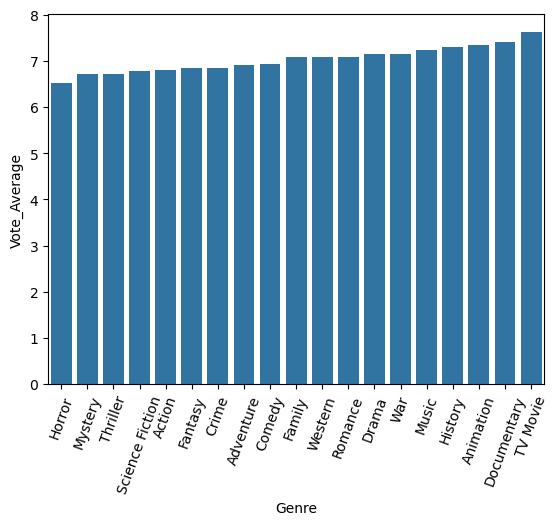

In [43]:
# Creating bar chart to show average vote count by genre
avg_vote_by_genre = movies_df_exploded.groupby('Genre').agg({'Vote_Average': 'mean'}).sort_values(by='Vote_Average')
sns.barplot(data=avg_vote_by_genre, x='Genre', y='Vote_Average')
plt.xticks(rotation=70) 
plt.show()

##### Evaluating popularity by number of movies made per genre

In [108]:
# Comparing genre popularity to previous decades 

# Read in TMDB movie data from 2005-2014
tmdb_data_2005_2014 = pd.read_csv(f'../data/movies_2005_2014.csv').drop_duplicates(subset=['Title','Year'])

# Read in TMDB movie data from 1995-2004
tmdb_data_1995_2004 = pd.read_csv(f'../data/movies_1995_2004.csv').drop_duplicates(subset=['Title','Year'])

# Convert Genre column to list type so that it can be exploded
tmdb_data_2005_2014['Genre'] = tmdb_data_2005_2014['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
tmdb_data_1995_2004['Genre'] = tmdb_data_1995_2004['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Explode the movies_df DataFrame by genre
tmdb_data_2005_2014_exploded = tmdb_data_2005_2014.explode('Genre')
tmdb_data_1995_2004_exploded = tmdb_data_1995_2004.explode('Genre')

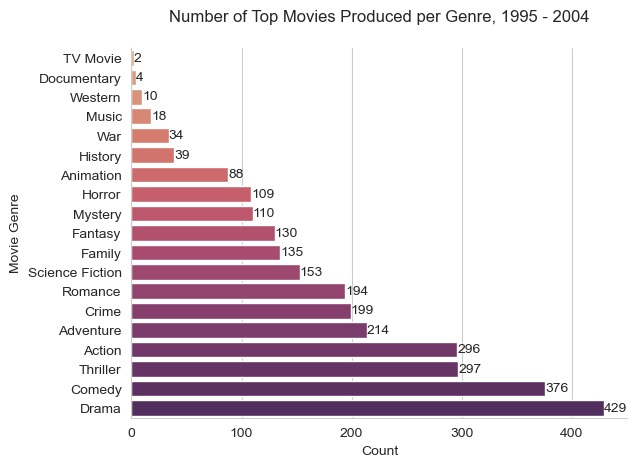

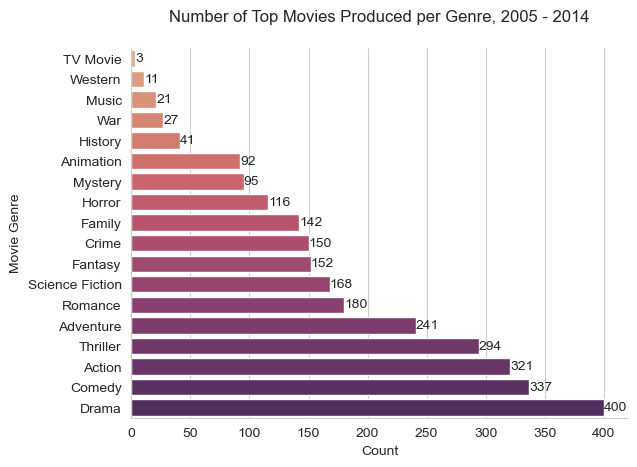

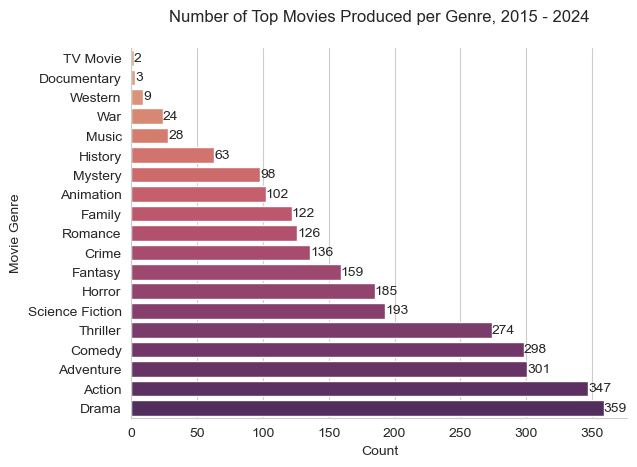

In [114]:
data = ({'df': tmdb_data_1995_2004_exploded, 'years': (1995, 2004)}, {'df': tmdb_data_2005_2014_exploded, 'years': (2005, 2014)}, {'df': movies_df_exploded, 'years': (2015,2024)})
for item in data:
    # Creating bar chart to show number of movies made by genre
    total_movies_by_genre = item['df'].groupby('Genre').agg({'Title': 'count'}).sort_values('Title')
    ax = sns.barplot(data=total_movies_by_genre, y='Genre', x='Title', orient='h', hue='Genre',legend=False, palette='flare')
    # Add gridlines
    sns.set_style('whitegrid')
    # Set title
    plt.title(f'Number of Top Movies Produced per Genre, {item['years'][0]} - {item['years'][1]}',y=1.05)
    # Set x and y-axis labels
    plt.ylabel('Movie Genre')
    plt.xlabel('Count')
    # Remove top and right borders
    sns.despine()
    # Add count labels to the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d') 
    plt.show()

Thriller, Comedy, Adventure, Action, and Drama are consistently the most popular genres over the past 3 decades, where popularity is represented by the top 100 movies by TMDB vote count per year.